# Практическая работа №3: Частотный анализ полиномиальных приближений

Выполнили студентки гр. 0382 Михайлова Оксана и Охотникова Галина. Вариант №12.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения

__Нерекурсивный фильтр__ характеризуется ограниченностью по времени его импульсной характеристики. Нерекурсивный цифровой фильтр описывавется уравнением вида:

$y_n = \sum_{k=-N}^Na_ks(n-k)$, где $a_k$ – коэффициенты, s - входное воздействие.

__Передаточная функция__ — это математическое выражение, которое связывает входной и выходной сигналы системы. Она описывает, как система изменяет входной сигнал для получения выходного сигнала.

__Метод наименьших квадратов__ - математический метод, основанный на минимизации суммы квадратов отклонений некоторых функций от экспериментальных входных данных. Описывается формулой:

$F = \sum_{k=1}^N(y_i - f(x_i))^2 \Rightarrow min $

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $ \tilde H(f) $. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

## Выполнение работы

In [21]:
import numpy as np
import math
import matplotlib.pyplot as plt

### Пункт 1.

Вывод формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по (2m+1) точкам:

Входной сигнал: $s(t)$

Выходной сигнал: $y(t) = A + Bt$.

Приближение по МНК прямой линией по (2m+1) точкам:

$F(A, B) = \sum_{k=-m}^{m} (s_k - y_k)^2 = \sum_{k=-m}^{m} (s_k - A - Bk)^2 \Rightarrow min$

Продифференцируем по коэффициентам A и B и приравняем к нулю, чтобы найти минимум:

$\begin{cases}
  F'_A(A,B) = -2\sum_{k=-m}^m (s_k - A - Bk) = 2((2m+1)A - \sum_{k=-m}^m s_k) = 0\\
  F'_B(A,B) = -2k\sum_{k=-m}^m (s_k - A - Bk) = -2\sum_{k=-m}^m (ks_k - Bk^2) = 0
\end{cases}$

Получим систему уравнений:

$\begin{cases}
  (2m + 1)A = \sum_{k=-m}^ms_k \\
  (2\sum_{k=1}^mk^2)B = \sum_{k=-m}^mks_k
\end{cases}$

В итоге получаем:

$y_0 = A = \frac{1}{2m+1}{\sum_{k=-m}^ms_k}$

В общем случае:

$y_n = \frac 1{2m+1}{\sum_{k=n-m}^{n+m}s_k}$

$s_n = e^{i\omega n}$

$y_n = \frac{1}{2m+1}\sum_{k=n-m}^{n+m}e^{i\omega k} = \frac{1}{2m+1}e^{i\omega n}\sum_{k=-m}^{m}e^{i\omega k} = H(\omega)e^{i\omega n}$

$H(\omega) = \frac{1}{2m+1}(e^{-mi\omega} + e^{(-m+1)i\omega} + ... + 1 + ... + e^{(m-1)i\omega} + e^{mi\omega}) = \frac{1}{2m+1}(1+ 2cos(\omega) + 2cos(2\omega) + ... + 2cos(m\omega))$

$H(\omega) = \frac{\sin(\frac{(2m + 1)\omega}{2})}{(2m+1)\sin(\frac{\omega}{2})}$

$H(\omega) = H(2\pi f) = \tilde{H}(f)$

Формула для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по (2m+1) точкам:

$\tilde{H}(f) = \frac{\sin((2m+1)\pi f)}{(2m+1)\sin(\pi f)}$

Построим графики $\tilde{H}(f)$ по 3, 5, 7 и 9 точкам:

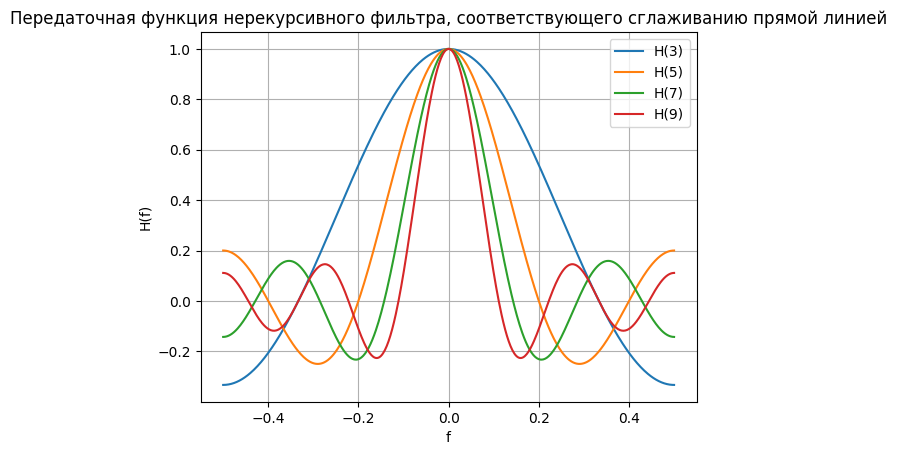

In [22]:
def tilde_H_1(m, f):
    return np.sin(m*math.pi*f)/(m*np.sin(math.pi*f))

f = np.linspace(-0.5, 0.5, 500)
plt.plot(f, tilde_H_1(3, f), label='H(3)')
plt.plot(f, tilde_H_1(5, f), label='H(5)')
plt.plot(f, tilde_H_1(7, f), label='H(7)')
plt.plot(f, tilde_H_1(9, f), label='H(9)')
plt.title('Передаточная функция нерекурсивного фильтра, соответствующего сглаживанию прямой линией')
plt.xlabel('f')
plt.ylabel('H(f)')
plt.legend()
plt.grid()
plt.show()

Графики симметричны относительно 0. На графиках видно, что каждая построенная передаточная функция имеет количество экстремумов, равное числу точек, которые использовались для ее построения. Следовательно, при увелечении количества точек для построения число колебаний увеличивается, а амплитуда колебаний уменьшается.

### Пункт 2.

Вывод формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по (2m+1) точкам:

Входной сигнал: $s(t)$

Выходной сигнал: $y(t) = A + Bt + Ct^2$.

Приближение по МНК полиномом второй степени по (2m+1) точкам:

$F(A, B, C) = \sum_{k=-m}^{m} (s_k - y_k)^2 = \sum_{k=-m}^{m} (s_k - A - Bk - Ck^2)^2 \Rightarrow min$

Продифференцируем по коэффициентам A и C и приравняем к нулю, чтобы найти минимум:

$\begin{cases}
  F'_A(A, B, C) = -2\sum_{k=-m}^m (s_k - A - Bk - Ck^2) = 0\\
  F'_C(A, B, C) = -2k^2\sum_{k=-m}^m (s_k - A - Bk - Ck^2) = 0
\end{cases}$

Получим систему уравнений:

$\begin{cases}
  \sum_{k=-m}^mA + \sum_{k=-m}^mk^2C = \sum_{k=-m}^ms_k \\
  \sum_{k=-m}^mk^2A + \sum_{k=-m}^mk^4C = \sum_{k=-m}^mk^2s_k
\end{cases}$

Введем обозначения для коэффициентов при А и С:

$K_0 := \sum_{k=-m}^{m}1$

$K_1 := \sum_{k=-m}^{m}k^2$

$K_2 := \sum_{k=-m}^{m}k^4$

Тогда получим:

$\begin{cases}
  K_0A + K_1C = \sum_{k=-m}^ms_k \\
  K_1A + K_2C = \sum_{k=-m}^mk^2s_k
\end{cases}$

Применим формулу Крамера для решения системы уравнений и получим:

$y_0 = A = \frac{\Delta_A}{\Delta} = \frac {K_2\sum_{k=-m}^ms_k - K_1\sum_{k=-m}^mk^2s_k}{K_0K_2-K_1^2}$

В общем случае:

$y_n = \frac {\sum_{k=n-m}^{n+m}(K_2-K_1k^2)s_k}{K_0K_2-K_1^2}$

$s_n = e^{i\omega n}$

$y_n = e^{i\omega n}\frac{1}{K_0K_2-K_1^2}\sum_{k=-m}^{m}(K_2-K_1k^2)e^{i\omega k} = e^{i\omega n}H(\omega)$

$H(\omega) = \frac{1}{K_0K_2-K_1^2}\sum_{k=-m}^{m}(K_2-K_1k^2)e^{i\omega k} = \frac{1}{K_0K_2-K_1^2}(K_2 + 2\sum_{k=1}^m(K_2 - K_1k^2)cos(\omega k))$

$H(\omega) = H(2\pi f) = \tilde{H}(f)$

Формула для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по (2m+1) точкам:

$\tilde{H}(f) = \frac{1}{K_0K_2-K_1^2}(K_2 + 2\sum_{k=1}^m(K_2 - K_1k^2)cos(2\pi fk))$

Построим графики $\tilde{H}(f)$ по 7, 9, 11 и 13 точкам:


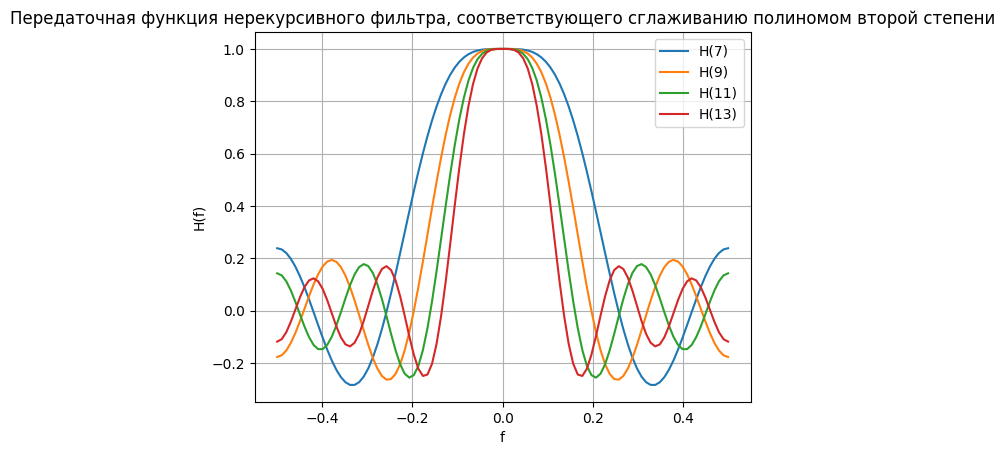

In [23]:
def K_i(m):
    K0, K1, K2 = 0, 0, 0
    for k in range(-m//2+1, m//2+1):
        K0 += 1
        K1 += k**2
        K2 += k**4
    return K0, K1, K2

def tilde_H_2(m, f):
    K0, K1, K2 = K_i(m)
    return list(map(lambda x: (K2 + 2*sum([(K2-K1*(k**2))*math.cos(2 * math.pi * x * k) for k in range(1, m//2+1)]))/(K0*K2-K1**2), f))


f = np.linspace(-0.5, 0.5, 100)

plt.plot(f, tilde_H_2(7, f), label='H(7)')
plt.plot(f, tilde_H_2(9, f), label='H(9)')
plt.plot(f, tilde_H_2(11, f), label='H(11)')
plt.plot(f, tilde_H_2(13, f), label='H(13)')
plt.title('Передаточная функция нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени')
plt.xlabel('f')
plt.ylabel('H(f)')
plt.legend()
plt.grid()
plt.show()

На графиках видно, что при увелечении количества точек для построения число колебаний увеличивается, а амплитуда колебаний уменьшается. Также при увеличении количества точек график становится круче. Промежуток частот, при которых не происходит искажения сигнала, шире, чем при сглаживании прямой линией.

### Пункт 3

Вывод формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвертой степени по (2m+1) точкам:

Входной сигнал: $s(t)$

Выходной сигнал: $y(t) = A + Bt + Ct^2 + Dt^3 + Et^4$.

Приближение по МНК полиномом второй степени по (2m+1) точкам:

$F(A, B, C, D, E) = \sum_{k=-m}^{m} (s_k - y_k)^2 = \sum_{k=-m}^{m} (s_k - A - Bk - Ck^2 - Dt^3 - Et^4)^2 \Rightarrow min$

Продифференцируем по коэффициентам A, C и E и приравняем к нулю, чтобы найти минимум:

$\begin{cases}
  F'_A(A, B, C, D, E) = -2\sum_{k=-m}^m (s_k - A - Bk - Ck^2 - Dk^3 - Ek^4) = 0\\
  F'_C(A, B, C, D, E) = -2k^2\sum_{k=-m}^m (s_k - A - Bk - Ck^2 - Dk^3 - ek^4) = 0\\
  F'_E(A, B, C, D, E) = -2k^4\sum_{k=-m}^m (s_k - A - Bk - Ck^2 - Dk^3 - ek^4) = 0
\end{cases}$

Получим систему уравнений:

$\begin{cases}
  \sum_{k=-m}^mA + \sum_{k=-m}^mk^2C + \sum_{k=-m}^mk^4E= \sum_{k=-m}^ms_k \\
  \sum_{k=-m}^mk^2A + \sum_{k=-m}^mk^4C + \sum_{k=-m}^mk^6E= \sum_{k=-m}^mk^2s_k\\
  \sum_{k=-m}^mk^4A + \sum_{k=-m}^mk^6C + \sum_{k=-m}^mk^8E= \sum_{k=-m}^mk^4s_k
\end{cases}$

Введем обозначения для коэффициентов при А, С и E:

$K_0 := \sum_{k=-m}^{m}1$

$K_1 := \sum_{k=-m}^{m}k^2$

$K_2 := \sum_{k=-m}^{m}k^4$

$K_3 := \sum_{k=-m}^{m}k^6$

$K_4 := \sum_{k=-m}^{m}k^8$

Тогда получим:

$\begin{cases}
  K_0A + K_1C + K_2E= \sum_{k=-m}^ms_k \\
  K_1A + K_2C + K_3E= \sum_{k=-m}^mk^2s_k\\
  K_2A + K_3C + K_4E= \sum_{k=-m}^mk^4s_k
\end{cases}$

Применим формулу Крамера для решения системы уравнений и получим:

$y_0 = A = \frac{\Delta_A}{\Delta} = \frac {(K_2K_4-K_3^2)\sum_{k=-m}^ms_k + (K_3K_2 - K_1K_4)\sum_{k=-m}^mk^2s_k + (K_1K_3 - K_2^2)\sum_{k=-m}^mk^4s_k} {K_0K_2K_4 + 2K_1K_2K_3 - K_2^3 - K_4K_1^2 - K_0K_3^2}$

В общем случае:

$y_n = \frac {\sum_{k=n-m}^{n+m}((K_2K_4-K_3^2) + (K_3K_2 - K_1K_4)k^2 + (K_1K_3 - K_2^2)k^4)s_k} {K_0K_2K_4 + 2K_1K_2K_3 - K_2^3 - K_4K_1^2 - K_0K_3^2}$

$s_n = e^{i\omega n}$

$y_n = e^{i\omega n}\frac{1}{K_0K_2K_4 + 2K_1K_2K_3 - K_2^3 - K_4K_1^2 - K_0K_3^2}\sum_{k=-m}^{m}((K_2K_4-K_3^2) + (K_3K_2 - K_1K_4)k^2 + (K_1K_3 - K_2^2)k^4)e^{i\omega k} = e^{i\omega n}H(\omega)$

$H(\omega) = \frac{1}{K_0K_2K_4 + 2K_1K_2K_3 - K_2^3 - K_4K_1^2 - K_0K_3^2}\sum_{k=-m}^{m}((K_2K_4-K_3^2) + (K_3K_2 - K_1K_4)k^2 + (K_1K_3 - K_2^2)k^4)e^{i\omega k} = \frac{1}{K_0K_2K_4 + 2K_1K_2K_3 - K_2^3 - K_4K_1^2 - K_0K_3^2}((K_2K_4-K_3^2) + 2\sum_{k=1}^m((K_2K_4-K_3^2) + (K_3K_2 - K_1K_4)k^2 + (K_1K_3 - K_2^2)k^4)cos(\omega k))$

$H(\omega) = H(2\pi f) = \tilde{H}(f)$

Формула для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвертой степени по (2m+1) точкам:

$\tilde{H}(f) = \frac{1}{K_0K_2K_4 + 2K_1K_2K_3 - K_2^3 - K_4K_1^2 - K_0K_3^2}((K_2K_4-K_3^2) + 2\sum_{k=1}^m((K_2K_4-K_3^2) + (K_3K_2 - K_1K_4)k^2 + (K_1K_3 - K_2^2)k^4)cos(2\pi fk))$

Построим графики $\tilde{H}(f)$ по 9, 11, 13 и 15 точкам:

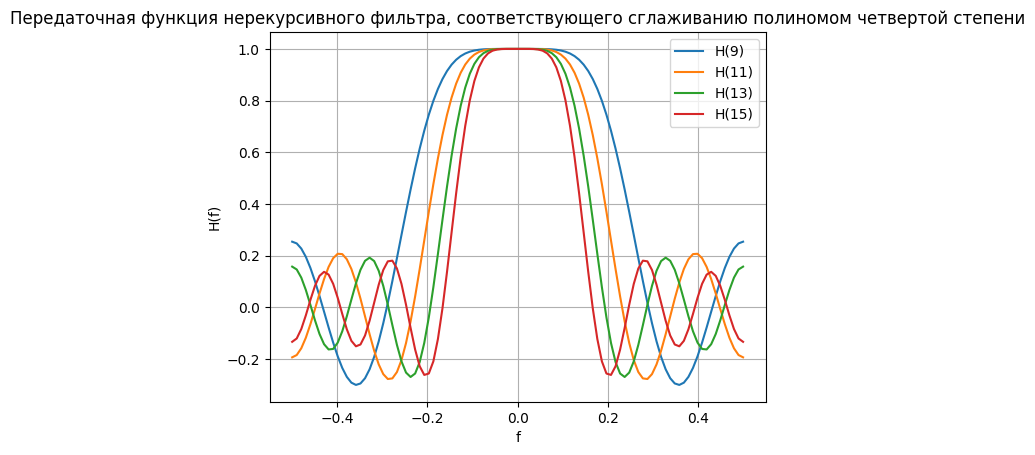

In [24]:
def K_i_2(m):
    K0, K1, K2, K3, K4 = 0, 0, 0, 0, 0
    for k in range(-m//2+1, m//2+1):
        K0 += 1
        K1 += k**2
        K2 += k**4
        K3 += k**6
        K4 += k**8
    return K0, K1, K2, K3, K4

def tilde_H_3(m, f):
    K0, K1, K2, K3, K4 = K_i_2(m)
    det = (K0*K2*K4 + 2*K1*K2*K3 - K2**3 - K4*K1**2 - K0*K3**2)
    return list(map(lambda x: (K2*K4-K3**2 + 2*sum([(K2*K4 - K3**2 +(K3*K2-K1*K4)*k**2 + (K1*K3-K2**2)*k**4)*math.cos(2 * math.pi * x * k) for k in range(1, m//2+1)]))/det, f))

f = np.linspace(-0.5, 0.5, 100)

plt.plot(f, tilde_H_3(9, f), label='H(9)')
plt.plot(f, tilde_H_3(11, f), label='H(11)')
plt.plot(f, tilde_H_3(13, f), label='H(13)')
plt.plot(f, tilde_H_3(15, f), label='H(15)')
plt.title('Передаточная функция нерекурсивного фильтра, соответствующего сглаживанию полиномом четвертой степени')
plt.xlabel('f')
plt.ylabel('H(f)')
plt.legend()
plt.grid()
plt.show()

Из полученных результатов видно, что закономерности изменений графиков при увеличении количества точек для построения сохраняются:
1. При увелечении количества точек для построения число колебаний увеличивается, а амплитуда колебаний уменьшается. 
2. При увелечении количества точек для построения графики становятся более крутыми. 

Также промежуток частот, при которых не происходит искажения сигнала, шире, чем при сглаживании прямой линией или сглаживании полиномом второй степени.

### Пункт 4

Вывод формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 15 и 21 точкам:

* Пятнадцатиточечная формула:

$y_n = {1 \over 320}(-3s_{n-7} - 6s_{n-6} - 5s_{n-5} + 3s_{n-4} + 21s_{n-3} + 46s_{n-2} - 67s_{n-1} + 74s_n + 67s_{n+1} + 46s_{n+2} + 21s_{n+3} + 3s_{n+4} - 5s_{n+5} - 6s_{n+6} - 3s_{n+7})$

* Соответствующая ей передаточная функция:

$H(f) = {1 \over 320}(74 + 134\cos(2\pi f) + 92\cos(4\pi f) + 42\cos(6\pi f) + 6\cos(8\pi f) - 10\cos(10\pi f) - 12\cos(12\pi f) - 6\cos(14\pi f))$

* Двадцатиодноточечная формула:

$y_n = {1 \over 350}(-s_{n-10} - 3s_{n-6} - 5s_{n-8} - 5s_{n-7} - 2s_{n-6} + 6s_{n-5} + 18s_{n-4} + 33s_{n-3} + 47s_{n-2} + 57s_{n-1} + 60s_n + 57s_{n+1} + 47s_{n+2} + 33s_{n+3} + 18s_{n+4} + 6s_{n+5} - 2s_{n+6} - 5s_{n+7} -5s_{n+8} -3s_{n+9} - s_{n+10})$

* Соответствующая ей передаточная функция:

$H(f) = {1 \over 350}(60 + 114\cos(2\pi f) + 94\cos(4\pi f) + 66\cos(6\pi f) + 36\cos(8\pi f) + 12\cos(10\pi f) - 4\cos(12\pi f) - 10\cos(14\pi f) - 10\cos(16\pi f) - 6\cos(18\pi f) - 2\cos(20\pi f))$


По построенным ниже графикам, можно сделать выводы по соответсвующим свойствам.  
 
Например, для формулы, в которой сглаживание происходит по 21 точке, наблюдается более высокая скорость уменьшения амплитуды, число колебаний больше. Также амплитуда снижается быстро. Это происходит из-за того, что увеличивается оптимальная частота.



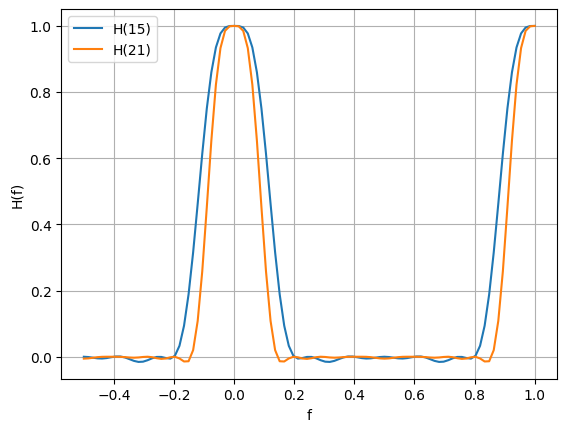

In [25]:
def H_15(x):
    return 1/320 * (74 + 134*np.cos(2*math.pi*x) + 92*np.cos(4*math.pi*x) + 42*np.cos(6*math.pi*x) + 6*np.cos(8*math.pi*x) - 10*np.cos(10*math.pi*x) - 12*np.cos(12*math.pi*x) - 6*np.cos(14*math.pi*x))

def H_21(x):
    return 1/350 * (60 + 114*np.cos(2*math.pi*x) + 94*np.cos(4*math.pi*x) + 66*np.cos(6*math.pi*x) + 36*np.cos(8*math.pi*x) + 12*np.cos(10*math.pi*x) - 4*np.cos(12*math.pi*x) - 10*np.cos(14*math.pi*x) - 10*np.cos(16*math.pi*x) - 6*np.cos(18*math.pi*x) - 2*np.cos(20*math.pi*x))

f = np.linspace(-0.5, 1, 100)
plt.plot(f, H_15(f), label='H(15)')
plt.plot(f, H_21(f), label='H(21)')
plt.xlabel('f')
plt.ylabel('H(f)')
plt.legend()
plt.grid()
plt.show()

### Пункт 5.

Построение графиков из предыдущих пунктов в логарифмической шкале для лучшей информативности:

$Дб = 20lg\Big(\frac{|y_n|}{|s_n|}\Big)$

Построенные с использование логарифмической шкалы графики более информативны. Они позволяют сделать вывод о том, что формулы сглаживания хорошо устраняют одни частоты и пропускают другие.

Доказательство данного утверждение видно из графиков, построенных ниже.

Первый пункт:

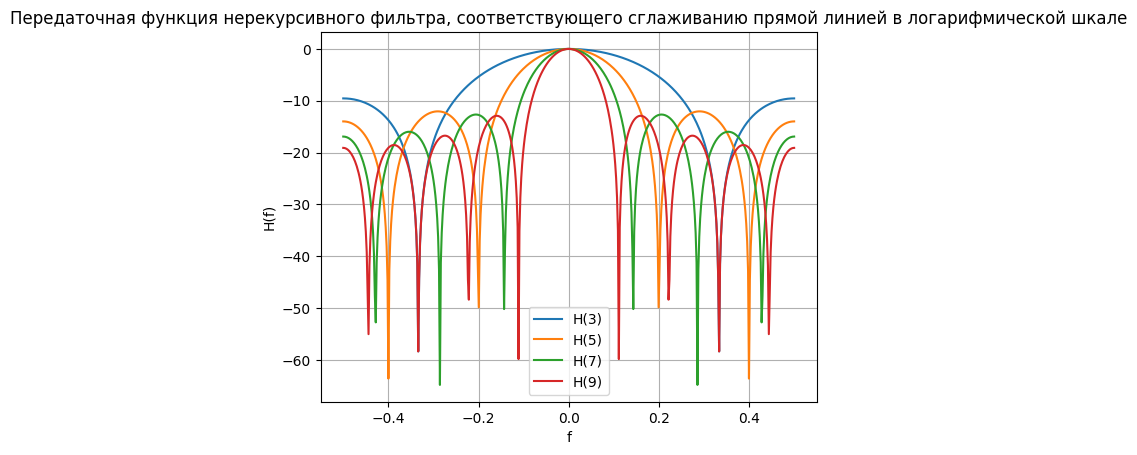

In [29]:
f = np.linspace(-0.5, 0.5, 500)
plt.plot(f, 20*np.log10(np.abs(tilde_H_1(3, f))), label='H(3)')
plt.plot(f, 20*np.log10(np.abs(tilde_H_1(5, f))), label='H(5)')
plt.plot(f, 20*np.log10(np.abs(tilde_H_1(7, f))), label='H(7)')
plt.plot(f, 20*np.log10(np.abs(tilde_H_1(9, f))), label='H(9)')
plt.title('Передаточная функция нерекурсивного фильтра, соответствующего сглаживанию прямой линией в логарифмической шкале')
plt.xlabel('f')
plt.ylabel('H(f)')
plt.legend()
plt.grid()
plt.show()

Второй пункт:

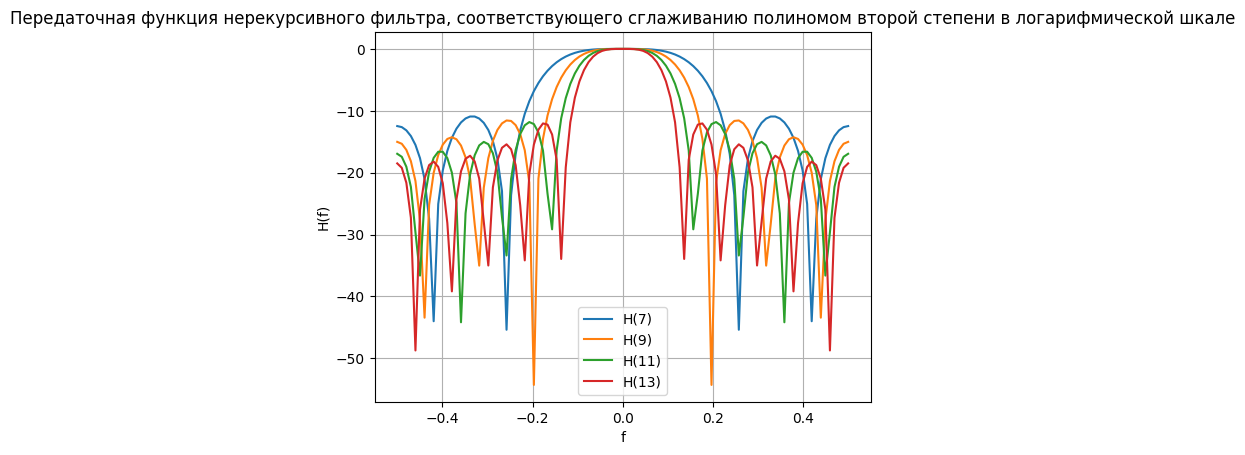

In [30]:
f = np.linspace(-0.5, 0.5, 100)

plt.plot(f, 20*np.log10(np.abs(tilde_H_2(7, f))), label='H(7)')
plt.plot(f, 20*np.log10(np.abs(tilde_H_2(9, f))), label='H(9)')
plt.plot(f, 20*np.log10(np.abs(tilde_H_2(11, f))), label='H(11)')
plt.plot(f, 20*np.log10(np.abs(tilde_H_2(13, f))), label='H(13)')
plt.title('Передаточная функция нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени в логарифмической шкале')
plt.xlabel('f')
plt.ylabel('H(f)')
plt.legend()
plt.grid()
plt.show()

Третий пункт:

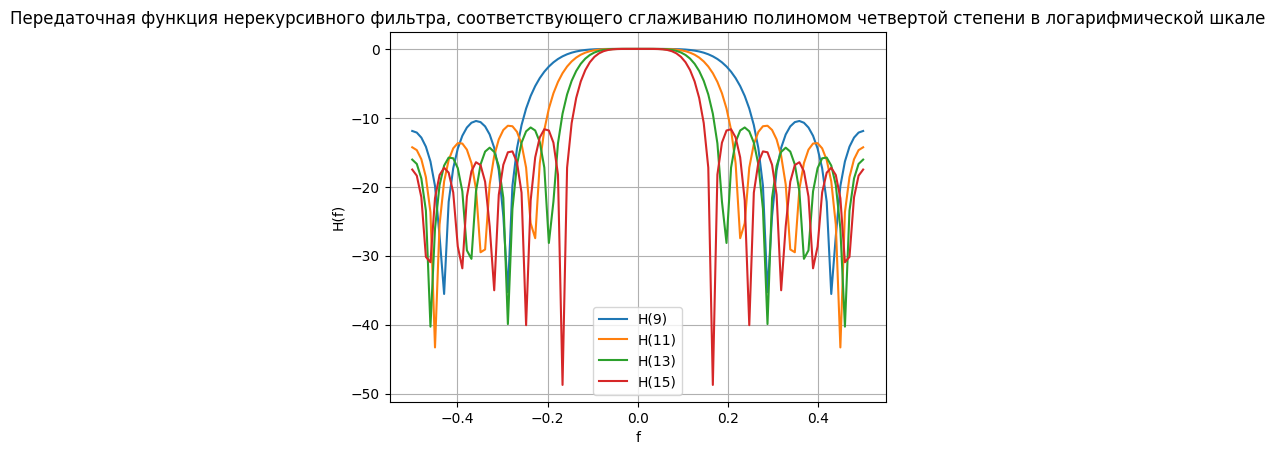

In [31]:
f = np.linspace(-0.5, 0.5, 100)

plt.plot(f, 20*np.log10(np.abs(tilde_H_3(9, f))), label='H(9)')
plt.plot(f, 20*np.log10(np.abs(tilde_H_3(11, f))), label='H(11)')
plt.plot(f, 20*np.log10(np.abs(tilde_H_3(13, f))), label='H(13)')
plt.plot(f, 20*np.log10(np.abs(tilde_H_3(15, f))), label='H(15)')
plt.title('Передаточная функция нерекурсивного фильтра, соответствующего сглаживанию полиномом четвертой степени в логарифмической шкале')
plt.xlabel('f')
plt.ylabel('H(f)')
plt.legend()
plt.grid()
plt.show()

### Пункт 6.

Сопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1–4:

1. Симметричность: графики обладают симметрией относительно нуля на оси абсцисс.
2. Чем больше степень полинома, тем больше зона, где пропущенный сигнал окажется без искажений.
3. Чем больше точек для сглаживания, тем меньше амплитуда колебаний.
4. Формулы Спенсера позволяют пропустить низкие частоты, но при этом высокие оказываются недоступны.
5. Если нужно большее количество информации из графиков, то их стоит оценивать по логарифмической шкале. 



## Выводы

В ходе выполнения данной лабораторной работы был проведен частотный анализ полиномиальных приближений. Была выведена формула нерекурсивного фильтра для сглаживания прямой линией по 3, 5, 7 и 9 точкам и построен соответсвующий график, из которого следует симметричность относительно нуля и прямая зависимость количества точек и числа колебаний. Была выведена формула для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам и построен график, из которого следует симметричность и прямая зависимость площади касания в окрестности нуля от количества точек. Была выведена формула для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам и построен соответствующий график, из которого следует симметричность и прямая зависимость степени полинома и площади касания в окрестности нуля. Была выведена формула ля передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам и построен график, из которого следует симметричность и быстрое снижение амплитуды. Был проведен сравнительный анализ для всех изученных передаточных функций.